## Dependencies

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [5]:
import numpy as np 
import pandas as pd

df = pd.read_csv('./review2.csv')


In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,listing_id,id,reviewer_id,negCount,posCount,...,month,1,cluster,bad,small,dirty,unfriend,far,inconvenient,disappoint
count,262515.000000,262515.000000,262515.000000,262515.000000,262515.000000,2.625150e+05,2.625150e+05,2.625150e+05,149986.000000,149986.000000,...,262515.000000,262515.0,262515.000000,6074.000000,6074.000000,6064.000000,6074.000000,6074.000000,6074.000000,5710.000000
mean,131257.000000,131257.000000,131257.000000,131257.000000,131257.000000,1.472952e+07,2.583727e+08,9.754595e+07,0.382722,16.936061,...,6.293743,1.0,2.055894,0.572111,0.698317,0.547674,0.583275,0.473090,0.538458,0.455652
std,75781.697296,75781.697296,75781.697296,75781.697296,75781.697296,9.185873e+06,1.345129e+08,7.347709e+07,0.861560,32.402831,...,3.519262,0.0,2.026812,0.189390,0.269093,0.150247,0.139337,0.160680,0.146171,0.194084
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.907400e+04,1.819730e+05,1.000000e+00,0.000000,0.000000,...,1.000000,1.0,-1.000000,0.260001,0.105960,0.164445,0.238607,0.128633,0.125858,0.084054
25%,65628.500000,65628.500000,65628.500000,65628.500000,65628.500000,6.510588e+06,1.438862e+08,3.253050e+07,0.000000,2.000000,...,3.000000,1.0,0.000000,0.445853,0.431451,0.424290,0.500513,0.352454,0.431240,0.279815
50%,131257.000000,131257.000000,131257.000000,131257.000000,131257.000000,1.497335e+07,2.559325e+08,8.344531e+07,0.000000,4.000000,...,6.000000,1.0,2.000000,0.491764,0.794579,0.529286,0.570642,0.423641,0.538031,0.415589
75%,196885.500000,196885.500000,196885.500000,196885.500000,196885.500000,2.175791e+07,3.635510e+08,1.526123e+08,0.000000,8.000000,...,10.000000,1.0,4.000000,0.659974,0.946757,0.647793,0.681905,0.561087,0.617340,0.598342
max,262514.000000,262514.000000,262514.000000,262514.000000,262514.000000,3.641146e+07,4.865819e+08,2.751997e+08,18.000000,100.000000,...,12.000000,1.0,5.000000,1.000000,0.999943,0.998729,0.994167,0.987323,0.998515,0.997396


In [1]:
import re
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

In [8]:
df[['negWord','posWord']][(df['sentiment'] == False) & (df['comments'].notna())].head(20)

,negWord,posWord
30,"['far', 'obviously']","['even', 'still', 'always']"
154,"['however', 'although']","['certainly', 'well', 'wash']"
164,"['small', 'small', 'miffed']","['definitely', 'safe', 'quick', 'well', 'safe']"
201,['although'],['happy']
246,"['small', 'old', 'old', 'unhappy']","['great', 'great', 'even', 'clean', 'whole', '..."
265,['although'],['actually']
271,"['small', 'small']",[]
272,['tiny'],['possible']
283,"['however', 'smaller', 'however', 'dirty', 'ho...","['actually', 'sensitive', 'good', 'choose', 'i..."
286,"['awful', 'bad', 'angry', 'disappointed']","['truly', 'good', 'recommended']"


In [49]:

#https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
#     pprint([(X.text, X.label_) for X in doc.ents])

def english(sent):
    try:
        return len(re.findall('[A-z]',sent))/len(sent) > 0.5
    except:
        return False 
def tokenize(comment,nlp):  
    doc = nlp(str(comment))
    return doc

def entity(comment):
    comment = [(X.text, X.label_) for X in comment.ents]
    return comment
def keyword(sent):
    #https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/
    out = [] 
    sent = sent.split()
    sent = nltk.pos_tag(sent)
    for word in sent:
        if word[0] in ['perfect','although','recommend','great','nice','near','close','old','noisy','convenient',]:
            out.append(word[0])
        try:
            word[1].index('JJ')
            out.append(word[0].lower())
        except:
            try:
                word[1].index('RB')
                out.append(word[0].lower())
            except:
                pass
    return out

def word(comment):
    return [ X for X in comment]

def stopword(sent,stop_list):
    sent = word_tokenize(sent)
    out = []
    for w in sent:
        if w not in stop_list and len(w) >2:
            out.append(str(w))
    return out
def clean(sent,lemma):
    out = []
    sent = nltk.pos_tag(sent)
    for word in sent:
        try:
            word[1].index('V')
            out.append(lemma.lemmatize(word[0].lower(),'v'))
        except:
            out.append(lemma.lemmatize(word[0].lower()))
    return " ".join(out)
def similarity(w1,w2):
    return sum(w1*w2) / sum(w1 *w2)**0.5/ sum(w2*w2)**0.5 



In [4]:
review = pd.read_csv('./Data/reviews.csv')

In [5]:
lemmatizer = WordNetLemmatizer()
stop_list = set(stopwords.words('english'))
nlp = en_core_web_sm.load()
print(review.shape)
print(review.columns)

review['eng'] = review['comments'].apply(english)
review['comments'] = review['comments'][review['eng'] == True].apply(stopword, args=(stop_list,))
review['comments'] = review['comments'][review['eng'] == True].apply(clean, args=(lemmatizer,))
review['comment_token'] = review['comments'][review['eng'] == True].apply(tokenize, args=(nlp,))
review['keyword'] = review['comments'][review['eng']== True].apply(keyword)
review['entities'] = review['comment_token'][review['eng'] == True].apply(entity)
# review['words'] = review['comment_token'][review['eng'] == True].apply(word)

(262515, 6)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


In [38]:
review[review['keyword'].isna()].head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,eng,comment_token,keyword,entities,negCount
57,69074,121083577,2016-12-13,46336404,沉沉,NaN,False,NaN,NaN,NaN,0.0
61,69074,129739011,2017-02-01,105815180,Cecilia,NaN,False,NaN,NaN,NaN,0.0
70,69074,170223813,2017-07-15,110099295,Jichu,NaN,False,NaN,NaN,NaN,0.0
71,69074,171567632,2017-07-18,69885276,Yilia,NaN,False,NaN,NaN,NaN,0.0
72,69074,174454984,2017-07-26,110252333,刘昱钦,NaN,False,NaN,NaN,NaN,0.0


In [23]:
from gensim import models

w2v = models.KeyedVectors.load_word2vec_format('../GoogleNews.bin',binary=True)

C:\Users\Chan Ho Park\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [9]:
out = []
out2 = []
out3 = []
out4 = [] 
index =[]

bad = w2v['bad']
small = w2v['small']
dirty = w2v['dirty']
unfriend = w2v['unfriendly']
far = w2v['far']
inconven = w2v['inconvenient']
disappoint = w2v['disappointed']

good = w2v['good']
clean = w2v['clean']
friend = w2v['friendly']
close = (w2v['close']+w2v['near'])/2
conven = w2v['convenient']
recommend = w2v['recommend']
response = w2v['responsive']
comfortable = w2v['comfortable']

false_pos = ['quite','really','much','dirty','right','little','there','back','bad','enough','only','inconvenient','very','not','outside']
skip = ['quite','much','larger','clean', 'good', 'awesome', 'clean', 'large','big','happy', 'friendly','hospitable', 'friendliest','huge','close','convenient','recommend'] 
for i,words in review['keyword'][(review['eng'] == True)  & (review['keyword'].notna())].iteritems():
    negword = [] 
    posword = []
    index.append(i)
    for word in words:
        try:
            vec = w2v[word]
            if word in false_pos:
                pass
            elif word in ['cozy','modern','brilliant'] or similarity(good,vec) > 0.6 or similarity(clean,vec) > 0.6 or similarity(friend,vec) > 0.6 or similarity(close,vec) > 0.6 or similarity(conven,vec) > 0.6 or similarity(recommend,vec) > 0.6 or  similarity(response,vec) > 0.6 or  similarity(comfortable,vec) > 0.6:
                posword.append(word)
            if word in skip:
                continue
        except:
            continue
        if word in ['however','although','noisy','old'] or similarity(vec, bad) > 0.7 or similarity(vec,small) > 0.8 or similarity(vec, dirty) > 0.7 or similarity(vec,unfriend) > 0.7 or similarity(vec,far) > 0.7 or similarity(vec,inconven) > 0.7 or similarity(disappoint,vec) > 0.7:
            negword.append(word)
    posword = [word for word in posword if word not in negword]
    negword = [word for word in negword if word not in posword]
    
    out4.append(posword)
    out2.append(negword)
    out.append(len(negword))
    if ('perfect' in posword) or ('best' in posword): 
        out3.append(100)
    else:
        out3.append(len(posword))
out = pd.Series(out, index=index)
out2 = pd.Series(out2,index=index)
out3 = pd.Series(out3,index=index)
out4 = pd.Series(out4,index=index)

print(out.shape)
print(out2.shape)
print(out3.shape)

review['negCount'] = pd.Series([None] * review.shape[0])
review['negWord'] = pd.Series([None] * review.shape[0])
review['posCount'] =  pd.Series([None] * review.shape[0])
review['posWord'] =  pd.Series([None] * review.shape[0])

review['negCount'].iloc[index] = out
review['negWord'].iloc[index] = out2
review['posCount'].iloc[index] = out3
review['posWord'].iloc[index] = out4

review[['posCount','negWord','negCount','comments']][(review['eng'] == True) & (review['negCount'].notna())& (review['negCount'] > 0)].sample(10)

C:\Users\Chan Ho Park\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


(149986,)
(149986,)
(149986,)


C:\Users\Chan Ho Park\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,posCount,negWord,negCount,comments
39694,100,[small],1,perfect location minute away closest metro sta...
27765,2,"[smaller, however]",2,yes place smaller depict photo however others ...
56044,1,[small],1,small room good location little bit difficult ...
19760,2,"[noisy, smelly]",2,the location convenient but house clean the ai...
144463,29,"[old, old, old, old, however]",5,grow hong kong go back visit family know place...
178241,1,[smaller],1,the room really smaller size picture lucian ho...
14965,8,"[horrible, bad, although, horrible]",4,j'ai rarement rédigé commentaire après séjours...
136067,2,"[old, old, noisy, noisy]",4,hong kong standard big flat old build central ...
146693,8,[small],1,extremely well situated apartment perfectly lo...
152346,100,[small],1,both fang place awesome fang super friendly ac...


In [2]:
review['sentiment'] = ((review['negCount']*2 - review['posCount'] < 1) | (len(review['negWord']) == 0))
review[['sentiment','negWord','posWord','comments']][(review['sentiment'] == False) & (review['comments'].notna())].sample(5)

,sentiment,negWord,posWord,comments
3877,False,"['old', 'old']","['convenient', 'quick']",cozy bright apartment heart funky area love wa...
210594,False,"['noisy', 'noisy', 'old', 'old']","['excellent', 'lively', 'well', 'good', 'good']",excellent location literally outside jordan mt...
63352,False,['scary'],['good'],room good but place scary many drunk people
217743,False,"['smaller', 'small', 'old', 'old']","['accurate', 'enjoyable', 'awesome', 'easy']",disappoint stay house smaller older expect tho...
3603,False,"['sad', 'although']","['hard', 'long', 'friendly']",book early avoid disappointment hard see apart...


In [3]:
review.to_csv('./1020.csv')

In [7]:
similarity(w2v['comfortable'],w2v['cozy'])

0.5806707739438449

## Analysis of individual user's review pattern
- We attempt to check whether individual users have a particular pattern 
    - Check correlation between  proportion of negative review and total number of review of particular user.
    - This again can be shown as a form of X- number of total review  / Y-proportion of negative review 
- We attempt to check whether negative reviews are correlated to the timestamp of review.

In [15]:
from collections import Counter
review = pd.read_csv('./1020.csv')
user_info_df = pd.read_csv('./1020_frequent_user_info.csv')

In [16]:
freq_index = user_info_df[['id',"negWord"]][user_info_df['num_total'] > 1].dropna().index
review['small'] = review['small'] -0.1
review.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'eng', 'comment_token', 'keyword', 'entities', 'negCount', 'negWord',
       'posCount', 'posWord', 'sentiment', 'timestamp', 'month', '1',
       'embed_dir', 'loc', 'neighbourhood', 'cluster', 'area', 'bad', 'small',
       'dirty', 'unfriend', 'far', 'inconvenient', 'disappoint', 'label'],
      dtype='object')

In [17]:
freq_index= review['dirty'].notna().tolist()

In [19]:
review['small'] = review['small'] -0.1
review['label'] = review[['bad','small','dirty','unfriend','far','inconvenient','disappoint']].iloc[freq_index].apply(lambda x: x.nlargest(1).idxmin(), axis=1 )

(array([ 503.,    0.,  392.,    0., 1398.,    0., 2638.,    0.,  973.,
         170.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

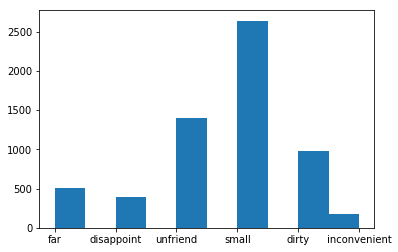

In [62]:
plt.hist(review['label'].iloc[freq_index].tolist())

## without bad
    - because it seems ambiguous

In [20]:
review['label'] = review[['small','dirty','unfriend','far','inconvenient','disappoint']].iloc[freq_index].apply(lambda x: x.nlargest(1).idxmin(), axis=1 )

(array([ 452.,    0.,  380.,    0., 2974.,    0., 1203.,    0.,  908.,
         157.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

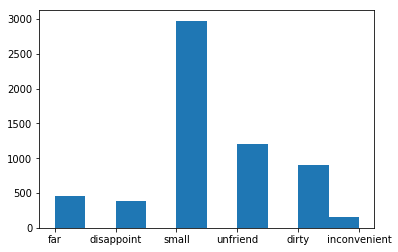

In [68]:
plt.hist(review['sentiment'].iloc[freq_index].tolist())

Total review number count Counter({1: 120655, 2: 9179, 3: 1722, 4: 557, 5: 212, 6: 114, 7: 59, 8: 32, 9: 22, 13: 10, 10: 10, 12: 9, 14: 7, 11: 5, 16: 4, 21: 2, 18: 2, 35: 1, 34: 1, 28: 1, 22: 1, 17: 1, 15: 1})

Negative review number count Counter()


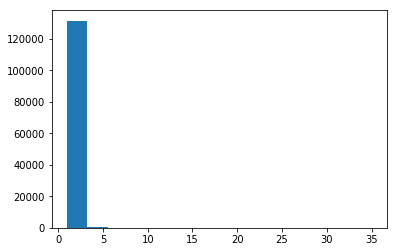

(array([2.491e+03, 1.730e+02, 5.400e+01, 1.500e+01, 1.900e+01, 8.000e+00,
        5.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 3.        ,  5.13333333,  7.26666667,  9.4       , 11.53333333,
        13.66666667, 15.8       , 17.93333333, 20.06666667, 22.2       ,
        24.33333333, 26.46666667, 28.6       , 30.73333333, 32.86666667,
        35.        ]),
 <a list of 15 Patch objects>)

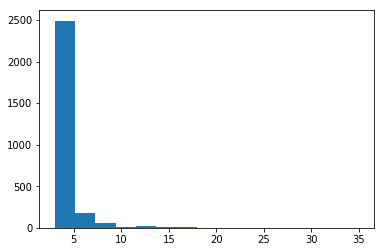

In [12]:
user_review_counts = review['reviewer_id'][(review['comments'].notna())].value_counts().tolist()
user_neg_review_counts =  review['reviewer_id'][(review['sentiment'] == False) & (review['comments'].notna())].value_counts().tolist()

print("Total review number count", Counter(user_review_counts))
print()
print("Negative review number count",Counter(user_neg_review_counts))
# histogram of number of negative reviews per user
plt.figure(1)
plt.hist(user_review_counts, bins=15)
plt.show()
plt.figure(2)
plt.hist([i for i in user_review_counts if i > 2], bins= 15)


In [21]:
neg_review_counts =  review['reviewer_id'][(review['sentiment'] == False) & (review['comments'].notna())].value_counts()
freq_user = neg_review_counts[neg_review_counts > 1].index.tolist()
print(len(freq_user))

68


C:\Users\Chan Ho Park\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(array([113.,   0.,   0.,  27.,   0.,   0.,   0.,   0.,   0., 126.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 10 Patch objects>)

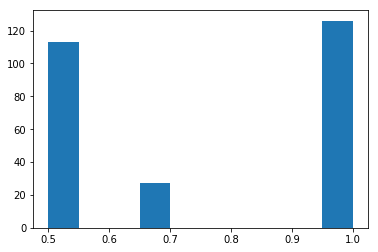

In [33]:
review['consistency'] = pd.Series([None]* review.shape[0])
for user_id in freq_user:
    senti_lis = Counter(review['label'][(review['label'].notna()) & (review['comments'].notna())&(review.reviewer_id == user_id)].tolist())
    proportion = senti_lis.most_common(1)[0][1]/sum(senti_lis.values())
    review['consistency'][review.reviewer_id == user_id] = proportion
consistency = review['consistency'][review['consistency'].notna()].tolist()
plt.hist(consistency)

In [62]:
user_list = review['reviewer_id'][(review['sentiment'] == False) & (review['comments'].notna())].value_counts().index
user_info = []
for user in user_list:
    user_negwords = review['negWord'][(review['sentiment'] == False) & (review['comments'].notna()) & (review['reviewer_id'] == user)].tolist()
    negwords = []
    for review_bow in user_negwords:
        negwords += review_bow.replace("\'",'').replace('[','').replace(']','').split(',')
    negwords = Counter(negwords)
    user_proportion = len(user_negwords) / review[(review['comments'].notna()) & (review['reviewer_id'] == user)].shape[0]
    # negword , proportion, total number of reviews
    user_info.append([user,user_negwords, user_proportion, review[(review['comments'].notna()) & (review['reviewer_id'] == user)].shape[0]])


Counter({1.0: 5130, 0.5: 586, 0.3333333333333333: 138, 0.25: 62, 0.2: 22, 0.16666666666666666: 14, 0.6666666666666666: 11, 0.125: 8, 0.14285714285714285: 8, 0.2857142857142857: 5, 0.1: 4, 0.1111111111111111: 3, 0.0625: 2, 0.18181818181818182: 1, 0.375: 1, 0.3: 1, 0.2222222222222222: 1, 0.4: 1, 0.03571428571428571: 1, 0.047619047619047616: 1, 0.06666666666666667: 1})


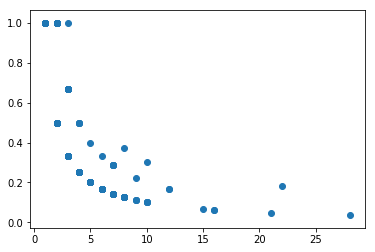

In [15]:
import numpy as np
# correlation between num of review / proportion of neg review
user_info = np.array(user_info)
plt.figure(2)
print(Counter(user_info[:,2]))
plt.scatter(user_info[:,3],user_info[:,2])
plt.show()

In [121]:
import re
# consistency in negwords
# whether user looks into particular aspect / more sensitive of listing
user_info = np.array(user_info)

user_info_df = pd.DataFrame(user_info, columns=["reviewer_id","negWord", "proportion", "num_total"])

freq_users = user_info_df[['id',"negWord"]][user_info_df['num_total'] > 1].dropna().values.tolist()
freq_index = user_info_df[['id',"negWord"]][user_info_df['num_total'] > 1].dropna().index
print("Number of frequent users",len(freq_users))


dir_ = [] 
# save embedding
for id_,user in freq_users:
    user = Counter(re.findall('[A-z]{1,}',str(user).replace('[','').replace(']','')))
    np_embeding = np.array(sum([user[key]*w2v[key] for key in user.keys()])/n)
    file_dir = './user_info/'+str(id_)+'.npy'
    np.save(file_dir,np_embeding)
    dir_.append(file_dir)

# words to be compared to
bad = w2v['bad']
small = w2v['small']
dirty = w2v['dirty']
unfriend = w2v['unfriendly']
far = w2v['far']
inconven = w2v['inconvenient']
disappoint = w2v['disappointed']

dir_df = pd.DataFrame(dir_,index= freq_index.tolist(),columns=['embedding_dir'])
user_info_df =user_info_df.join(dir_df)

user_sensitive = [[similarity(bad,np.load(embed_dir)),similarity(small,np.load(embed_dir)),similarity(dirty,np.load(embed_dir)),similarity(unfriend,np.load(embed_dir)),similarity(far,np.load(embed_dir)), similarity(inconven,np.load(embed_dir)), similarity(disappoint,np.load(embed_dir))] for embed_dir in dir_]
user_sensitive_df = pd.DataFrame(user_sensitive, index= freq_index.tolist(),columns=["bad","small","dirty","unfriend","far","inconvenient","disappoint"])

user_info_df =user_info_df.join(user_sensitive_df)
user_info_df['sensitive'] = user_info_df[["bad","small","dirty","unfriend","far","inconvenient","disappoint"]].iloc[freq_index].apply(lambda x: x.nlargest(1).idxmin(), axis=1)
user_info_df.to_csv('./1020_user_info.csv')
print(user_info_df.head(5))


Number of frequent users 911


C:\Users\Chan Ho Park\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


          id                                       negWord proportion  \
0  103830673          [['bad'], ['bad'], ['bad'], ['bad']]   0.181818   
1  215150382  [['noisy', 'noisy'], ['smaller'], ['noisy']]      0.375   
2   17106194   [['smelly'], ['unwelcome'], ['old', 'old']]        0.3   
3  140515443            [['bad'], ['bad'], ['old', 'old']]          1   
4  229325238        [['bad'], ['small', 'weird', 'dirty']]          1   

  num_total              embedding_dir       bad     small     dirty  \
0        22  ./user_info/103830673.npy  0.866025  0.327446  0.573550   
1         8  ./user_info/215150382.npy  0.364007  0.513897  0.510829   
2        10   ./user_info/17106194.npy  0.623753  0.423531  0.688895   
3         3  ./user_info/140515443.npy  0.912442  0.374036  0.638298   
4         2  ./user_info/229325238.npy  0.922080  0.669961  0.917312   

   unfriend       far  inconvenient  disappoint sensitive  
0  0.590547  0.377426      0.534248    0.498425       bad  
1  0.583

In [122]:
user_info_df['sensitive'].value_counts()

small           419
bad             197
unfriend        119
dirty            60
far              59
disappoint       43
inconvenient     14
Name: sensitive, dtype: int64

## Seasonality of negative review

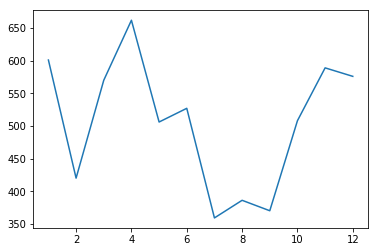

In [135]:
import time
import datetime

review['1'] = 1
review['timestamp'] = review['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").timestamp())
review['month'] = review['date'].apply(lambda x: x.split('-')[1])

all_per_month = review[["1","month"]][review['comments'].notna()].groupby(['month']).sum()
neg_per_month = review[["1","month"]][(review['sentiment'] == False) & (review['comments'].notna())].groupby(['month']).sum()

all_per_month = [k[0] for k in all_per_month.values]
neg_per_month = [k[0] for k in neg_per_month.values]
avg_per_month = [(k)/j for j,k in zip(all_per_month,neg_per_month)]

plt.figure(3)
plt.plot(range(1,13),neg_per_month)

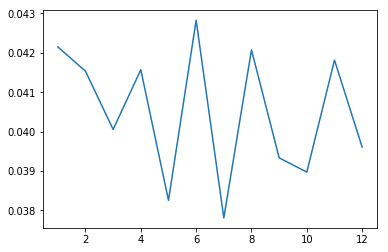

In [137]:
plt.figure(4)
plt.plot(range(1,13),avg_per_month)

## Additional label for negative review

In [174]:
dir_ = []
for i,row in review[['negWord','id']][(review['sentiment'] == False) & (review['comments'].notna())].iterrows():
    tmp = np.array([0.0]*300)
    row2 = re.findall('[A-z]{1,}',str(row.values).replace('[','').replace(']',''))
    id_ = re.findall('[0-9]{1,}',str(row.values))[0]
    for word in row2:
        tmp += w2v[word]
    tmp = tmp/len(row2)
    filen = './review_embed/'+str(id_)+'.npy'
    np.save(filen,tmp)
    dir_.append(filen)
index_ = review[(review['sentiment'] == False) & (review['comments'].notna())].index
review = review.join(pd.DataFrame(dir_,index=index_,columns=['embed_dir']))
review.to_csv('./1020.csv')

In [228]:
review = review.drop(["bad","small","dirty","unfriend","far","inconvenient","disappoint","label"],axis=1)
review_analysis = [[similarity(bad,np.load(embed_dir)),similarity(small,np.load(embed_dir)),similarity(dirty,np.load(embed_dir)),similarity(unfriend,np.load(embed_dir)),similarity(far,np.load(embed_dir)), similarity(inconven,np.load(embed_dir)), similarity(disappoint,np.load(embed_dir))] for embed_dir in dir_]
review_analysis = pd.DataFrame(review_analysis, index= index_.tolist(),columns=["bad","small","dirty","unfriend","far","inconvenient","disappoint"])

review =review.join(review_analysis)
review['label'] = review[["bad","small","dirty","unfriend","far","inconvenient","disappoint"]].iloc[index_].apply(lambda x: x.nlargest(1).idxmin(), axis=1)


C:\Users\Chan Ho Park\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


In [229]:
review.to_csv('./1020.csv')
review[(review['sentiment'] == False) & (review['comments'].notna())].head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,listing_id,id,date,reviewer_id,reviewer_name,comments,eng,...,cluster,area,bad,small,dirty,unfriend,far,inconvenient,disappoint,label
30,30,30,30,69074,29636067,2015-04-10,2012951,Alba,amy kind short notice far away obviously even ...,True,...,2,2-Central & Western,0.687531,0.420603,0.554211,0.516772,1.029943,0.558322,0.780339,far
154,154,154,154,103760,610682,2011-10-09,901583,Sue,the unit certainly well locate however wash ma...,True,...,5,5-Central & Western,0.573804,0.546277,0.475505,0.542242,0.751765,0.542051,0.759420,disappoint
164,164,164,164,103760,851047,2012-01-09,1141647,Nirvikar,definitely small apartment back alley entrance...,True,...,5,5-Central & Western,0.625423,0.996150,0.585357,0.737101,0.435652,0.679201,0.825314,small
201,201,201,201,103760,3560350,2013-02-17,4693790,Kim Yee,overall happy stay apartment although misarran...,True,...,5,5-Central & Western,0.454820,0.440006,0.373953,0.444038,0.674789,0.421276,0.704939,disappoint
246,246,246,246,103760,11999701,2014-04-21,855308,Chris,the flat great location given middle city thou...,True,...,5,5-Central & Western,0.734580,0.788143,0.643821,0.762738,0.488577,0.660232,0.749298,small
265,265,265,265,103760,22206250,2014-11-01,21514030,Andrey,willing wait owner apartment 30-40 minute alth...,True,...,5,5-Central & Western,0.454820,0.440006,0.373953,0.444038,0.674789,0.421276,0.704939,disappoint
271,271,271,271,103760,24178268,2014-12-22,19267125,Colette,the apartment small picture take use wire angl...,True,...,5,5-Central & Western,0.445853,1.000000,0.424290,0.500513,0.352454,0.431240,0.279815,small
272,272,272,272,103760,25552880,2015-01-19,3944044,Genevieve,location brilliant short walk central mtr clos...,True,...,5,5-Central & Western,0.315233,0.794579,0.452006,0.437778,0.354259,0.415639,0.154624,small
283,283,283,283,103760,40355112,2015-07-30,23052011,Dayoung,location perfectly central 5mins walk distance...,True,...,5,5-Central & Western,0.884822,0.777118,1.095058,0.928000,0.780612,0.921745,0.864084,dirty
286,286,286,286,103760,50022535,2015-10-08,24786922,Vivi,our stay brend flat really awful there bad sne...,True,...,5,5-Central & Western,0.963639,0.404484,0.708954,0.833713,0.510696,0.753278,1.045677,disappoint


# Listing.csv

In [2]:
listing = pd.read_csv('./Data/listings.csv')
listing['neighbourhood'].value_counts()

Yau Tsim Mong        4764
Central & Western    2628
Wan Chai             2315
Islands               547
Kowloon City          465
Eastern               402
Sham Shui Po          261
Yuen Long             246
North                 232
Sai Kung              169
Sha Tin               123
Southern              113
Kwun Tong              68
Tsuen Wan              63
Tai Po                 55
Tuen Mun               54
Kwai Tsing             39
Wong Tai Sin           25
Name: neighbourhood, dtype: int64

In [11]:
listing.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1408,3,130,2019-05-02,1.27,1,159
1,101765,Lamma Island flat 2min walk from the beach!,532909,Michael,NaN,Islands,22.20022,114.13461,Entire home/apt,430,2,11,2019-06-09,0.71,1,47
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,853,2,260,2019-07-04,2.65,12,329
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1056,2,259,2019-07-03,2.66,12,308
4,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.28343,114.15539,Entire home/apt,939,2,27,2015-06-30,0.28,1,91


In [3]:
from sklearn.cluster import KMeans

def cluster_num(loc,km):
    '''
    k mean cluster the neighborhood based on geographical location
    '''
    return km.predict([loc])[0]


def build_kmean(cluster,X,fig):
    plt.figure(2,figsize=(12,10))
    km = KMeans(
        n_clusters=cluster, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    X = pd.DataFrame(X,columns=['x','y'])
    y_km = km.fit_predict(X)
    plt.figure(fig)
    for i in range(cluster):
        plt.scatter(
            X['x'][y_km == i], X['y'][y_km == i],
            s=50,
            marker='s', edgecolor='black',
            label='cluster '+ str(i)
        )
    return km
def neighbour(listing_id):
    try:
        tmp = listing['neighbourhood'][listing['id'] == listing_id].values.tolist()
        if len(tmp) == 1:
            return tmp[0]
        else:
            print(tmp)
            return "Nan"
    except:
        return "Nan"

def listing_loc(id_):
    '''
    append column on review
        -the location of the listing 
    '''
    return id2loc[id_]

In [4]:
global listing
listing = pd.read_csv('./Data/listings.csv')
print(listing.columns)
print(listing.shape)
listing.head(10)
global id2loc
id2loc = listing[['latitude','longitude','id']].values
id2loc = {z:[x,y] for x,y,z in id2loc }
X = pd.DataFrame([id2loc[x] for x in id2loc],columns=['x','y'])

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
(12569, 16)


118603


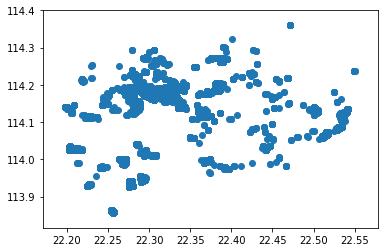

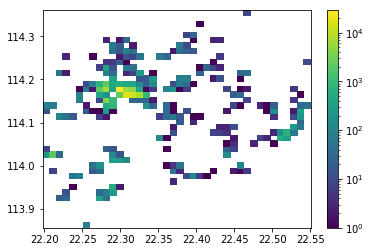

In [63]:
# Yau Tsim Mong        4764
# Central & Western    2628
# Wan Chai             2315
# review['loc'] = review['listing_id'].apply(listing_loc)
# review['neighbourhood'] = review['listing_id'].apply(neighbour)
from matplotlib.colors import LogNorm
import numpy as np
neg_locs = review['loc'][review['sentiment'] == False].values.tolist()
print(len(neg_locs))
plt.figure(3)
plt.scatter([loc[0] for loc in neg_locs], [loc[1] for loc in neg_locs])
plt.figure(4)
h, x1,y1, bar = plt.hist2d([loc[0] for loc in neg_locs], [loc[1] for loc in neg_locs],bins= (40,40),norm=LogNorm())
plt.colorbar(bar)
plt.show()

In [ ]:
x = [j/i for i,j in zip(x1,x2)]
y = [j/i for i ,j in zip(y1,y2)]


## Analysis of sentiment of review by location/listing

- First thing would be to check whether there is consistentcy in negative review respect to listing.
    - check correlation between the negative keywords of negative reviews in one listing 
    - if there is correlation then there is a consistent problem in the listing
- We attempt to check whether there is a correlation between the neighborhood and negative review.
    - 
- This is done by checking the proportion of negative review per 100 review of a particular neigborhood.
    -

262515


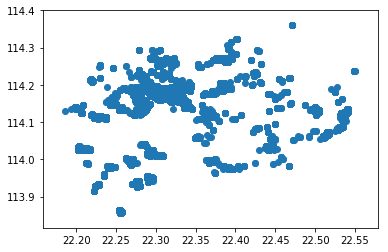

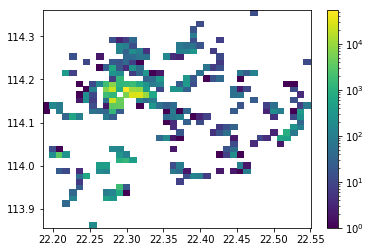

In [65]:

locs = review['loc'].values.tolist()
print(len(locs))
plt.figure(5)
plt.scatter([loc[0] for loc in locs], [loc[1] for loc in locs])
plt.figure(6)
h, x2,y2, bar = plt.hist2d([loc[0] for loc in locs], [loc[1] for loc in locs],bins= (40,40),norm=LogNorm())
plt.colorbar(bar)
plt.show()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'listing_id', 'id',
       'date', 'reviewer_id', 'reviewer_name', 'comments', 'eng',
       'comment_token', 'keyword', 'entities', 'negCount', 'negWord',
       'posCount', 'posWord', 'sentiment', 'timestamp', 'month', '1',
       'embed_dir', 'bad', 'small', 'dirty', 'unfriend', 'far', 'inconvenient',
       'disappoint', 'label', 'loc', 'neighbourhood', 'cluster', 'area'],
      dtype='object')


C:\Users\Chan Ho Park\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')

<Figure size 864x720 with 0 Axes>

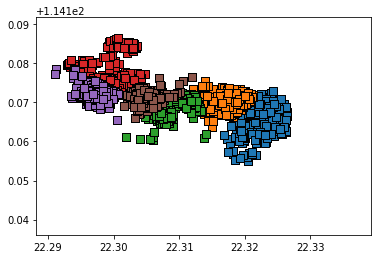

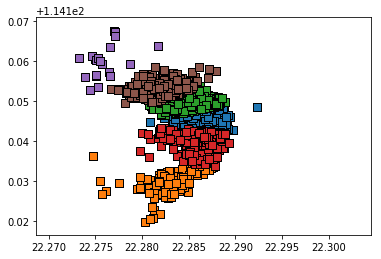

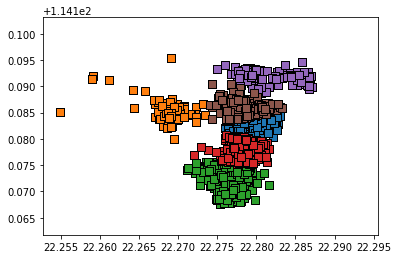

In [215]:
review['cluster'] = [-1] * review.shape[0]
print(review.columns)
cluster = 6
for i,n in enumerate(['Yau Tsim Mong','Central & Western','Wan Chai']):
    X = review['loc'][review['neighbourhood'] == n ].values
    X = [[x[0],x[1]] for x in X]
    kmean = build_kmean(cluster,X,10+i)
    review['cluster'][review['neighbourhood'] == n ] = review['loc'][review['neighbourhood'] == n ].apply(cluster_num,args=(kmean,))
review[review['neighbourhood'] == 'Wan Chai'].sample(20)

## Calendar.csv


In [13]:
cal = pd.read_csv('./Data/calendar.csv')
cal['1'] = 1
cal.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,1
0,69074,2019-09-20,f,"$1,104.00","$1,104.00",3,365,1
1,69074,2019-09-21,f,"$1,104.00","$1,104.00",3,365,1
2,69074,2019-09-22,f,"$1,065.00","$1,065.00",3,365,1
3,69074,2019-09-23,f,"$1,073.00","$1,073.00",3,365,1
4,69074,2019-09-24,f,"$1,300.00","$1,300.00",3,365,1


In [11]:
cal.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', '1'],
      dtype='object')

(array([ 788.,  646., 1722.,  416., 1054.,  226.,  230.,  518.,  504.,
        3468.]),
 array([  1. ,  37.4,  73.8, 110.2, 146.6, 183. , 219.4, 255.8, 292.2,
        328.6, 365. ]),
 <a list of 10 Patch objects>)

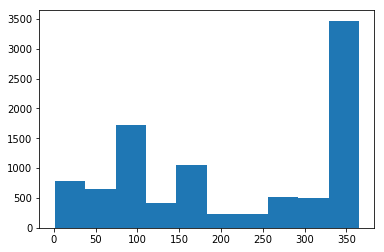

In [12]:
import matplotlib.pyplot as plt
listing_dates = cal[cal['available'] == 't'].groupby('listing_id')['1'].sum().tolist()
plt.figure(1)
plt.hist(listing_dates)
